In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import scikitplot as skplt
import numpy as np
from pdpbox import pdp, info_plots

In [2]:
pd.set_option('max_columns', None)
df=pd.read_csv('/Users/yufan/Downloads/bank-additional/bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Input variables:
Detailed Info about dataset can be found __[here](https://archive.ics.uci.edu/ml/datasets/bank+marketing)__ 
* bank client data:
1. age (numeric)
2. job : type of job 
3. marital : marital status
4. education 
5. default: has credit in default? 
6. housing: has housing loan? 
7. loan: has personal loan? 
* related with the last contact of the current campaign:
8. contact: contact communication type
9. month: last contact month of year 
10. day_of_week: last contact day of the week 
11. duration: last contact duration, in seconds (numeric). 
* other attributes:
12. campaign: number of contacts performed during this campaign and for this client 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client 
15. poutcome: outcome of the previous marketing campaign
* social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator
17. cons.price.idx: consumer price index - monthly indicator 
18. cons.conf.idx: consumer confidence index - monthly indicator 
19. euribor3m: euribor 3 month rate - daily indicator
20. nr.employed: number of employees - quarterly indicator 

* Output variable (desired target):
21. y - has the client subscribed a term deposit? 

## Data cleaning and preparation

### Handling missing values
* filter
* imputation

In [4]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Handling duplicate values


In [5]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [6]:
df=df.drop_duplicates()

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### catogorical variable encoding
1. one hot encoding
* Pandas get_dummy function
* Scikit-learn OneHotEncoder

2. reponse encoding
3. label encoding

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df_cols=['job','marital','education', 'default', 'housing', 'loan',
       'contact','month','day_of_week','poutcome']

In [10]:
labelencoder = LabelEncoder()
for i in df_cols:
    df[i]= labelencoder.fit_transform(df[i]) 

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df['y'].replace({'yes':1,'no':0},inplace=True)

## Feature Selection

> because 'duration' highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [13]:
df.drop(['duration'], axis=1, inplace=True)

## Data Split

In [14]:
X = df.drop("y", axis=1)
Y = df['y']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=42)

## Handling Imbalance Data

### This dataset is a imbalanced dataset with 'no' as majority
* Here I use resampling method

In [15]:
df['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

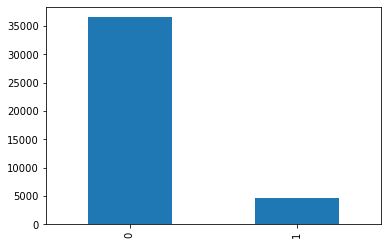

In [16]:
df['y'].value_counts().plot(kind='bar')
plt.show()

In [17]:
smote = SMOTE(random_state=42)
# fit predictor and target variable
X_train, Y_train = smote.fit_resample(X_train, Y_train)
Y_train.value_counts()


0    27443
1    27443
Name: y, dtype: int64

## Model Building

### Random Forest

In [18]:
clf_rf = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
#clf_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)

#### Feature Importance Plot

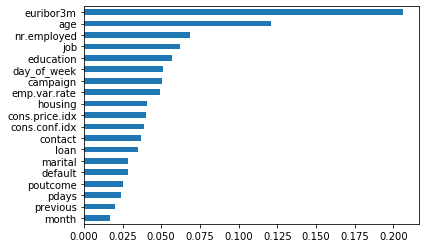

In [19]:
#Let's plot variable importance 
feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

#### PDP Plot Example

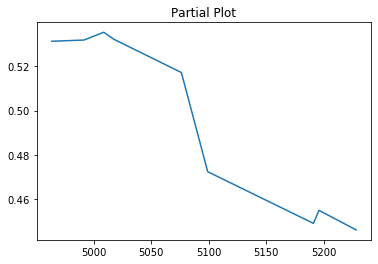

In [21]:
pdp_iso = pdp.pdp_isolate(model=clf_rf, 
                          dataset=X_train,      
                          model_features=list(X_train), 
                          feature='nr.employed', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Partial Plot')
plt.show()

A rise in __number of employees__ indicator has positive implications for consumer spending which stimulates economic growth, which can explain why people are less likly to suscribe a term deposit.

## Model Evaluation

In [22]:
y_pred = clf_rf.predict(X_test)

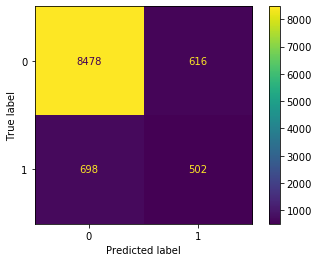

In [25]:
cm = confusion_matrix(Y_test, y_pred, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf_rf.classes_)
disp.plot()
plt.show()

How to understand the matrix above?

<div>
<img src=".\S.png" align="left",width="500"/>
</div>

Based on the matrix, we can calculate misclassification cost:<br>
If a customer is predicted to be non-subscriber but actually he/she is -> The customer doesn't get informed about this campaign and the company lost revenue.<br>
If a customer is predicted to be subscriber but actually he/she is not -> The advertising cost on the customer is sunk cost.

In [26]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9094
           1       0.45      0.42      0.43      1200

    accuracy                           0.87     10294
   macro avg       0.69      0.68      0.68     10294
weighted avg       0.87      0.87      0.87     10294



### ROC/AUC

The model uses 0.5 as cut-off value. However, 0.5 is not always the best cut-off value. It depends on what metrics we care about.

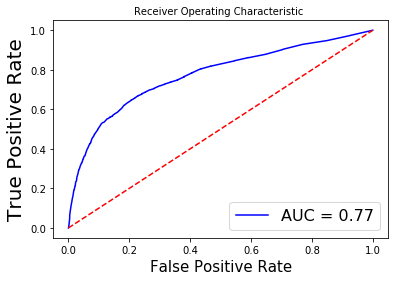

In [30]:
probs =clf_rf.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(Y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

ROC curve describes the change of TPR and FPR when cut-off decreases from 1 to 0. For example, if we want to maximize TPR, we can decrease cut-off to the point that gives FPR near 0.2. However, as we decrease cut-off, more people who are not our target customers will be identified as target.Under the condition that the marketing budget is limited. tele-marketing on non-target customers will probably waste money.

## Business Insights

Business department concerns about customer ranking, because they want to tele-marketing on the people with highest probability to subscribe the term deposit.<br>

From the cumulative gains curve shown below, it indicates that selecting the top 20% of the customers ranked as probability from high to low, will contain just about 60% of the actual responder. That is, if there are 25,000 customer info in company's database, and because of mkt buget limit, they can only give phone calls to 5,000 customer. If they choose top 20% ( 25,000*20%=5,000 ) of the customer, there will be 60% of actual subscribers been captured.<br>

However, if not using the model and randomly selecting target customers, only 20% of actual subscribers will be captured just as baseline curve shows.

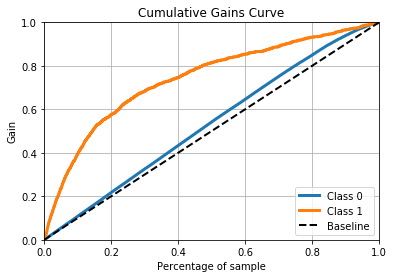

In [32]:
probs =clf_rf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test,probs)
plt.show()

we are interested in __Class 1 curve__ as we want to predict targets

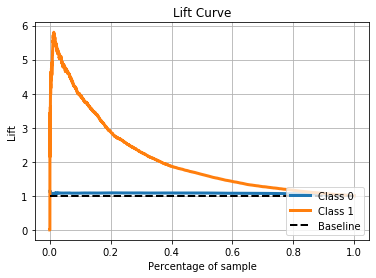

In [58]:
skplt.metrics.plot_lift_curve(Y_test,probs)
plt.show()

>the lift curve shows how many times more than average the model reaches targets when a given percentage of the population that is most likely to be target according to the model is considered.

For an ad campaign, assume fixed_costs = 1500, variable_costs_per_unit = 10, average revenue per unit (ARPU) = 50

In [42]:
y_true=np.asarray(Y_test)
y_score=probs[:,1]
sorted_indices=np.argsort(y_score)[::-1]
#Index a Numpy Array by another Array
y_true = y_true[sorted_indices]
percentages=np.arange(start=1, stop=len(y_true) + 1)
percentages = percentages / float(len(y_true))

In [46]:
fixed_c=1500
vc_per_unit=10
rev_per_unit=50

In [55]:
def cost_revenue_profit_curve(fc,vc,arpu):
    y_rev=y_true*rev_per_unit
    rev=np.cumsum(y_rev)
    y_cost=np.arange(start=1, stop=len(y_true) + 1)
    cost = fixed_c+ vc_per_unit * y_cost
    profit=rev-cost
    plt.plot(percentages,rev, '-',label="revenues")
    plt.plot(percentages,cost, '-',label="cost")
    plt.legend(loc="upper right")
    plt.title('Cost/Revenue')
    plt.show()
    plt.plot(percentages,profit, '-',label="profit")
    plt.axhline(y=0, color='r', linestyle='--',label="break-even")
    plt.legend(loc="upper right")
    plt.title('Profit')
    plt.show()
    

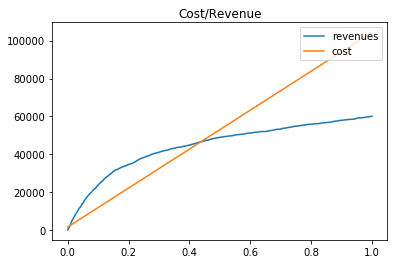

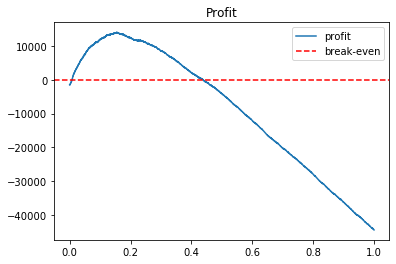

In [56]:
cost_revenue_profit_curve(fixed_c,vc_per_unit,rev_per_unit)

From the plot, we can see that targeting on top 20 percent customers will help us maximize profit.

If you want to use package, refer to __[here](https://github.com/modelplot/modelplotpy/blob/master/jn_tests_modelplotpy.ipynb)__ 